In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
from scipy import interpolate
plt.rc('font',family='Times New Roman')

In [45]:
L=420e-6
H=80e-6
Pe = 0.01
DO2 = 7.63596e-6
H = 80e-6
w=20e-6
U_0 = Pe*DO2/w
umax=1.5*U_0
Tref=773
rhof=4.4908
Mwf=0.02888
x_O2=0.22


# Read COMSOL Data

## Read Centerline x from COMSOL

In [46]:
x_centerline_file_comsol="./plots/output-x-centerline.txt"
with open(x_centerline_file_comsol,"r") as fp:
    lines=fp.readlines()
    header=lines[8]
header=re.split(r" +(?![t@(])",header)
header.pop(0)
header[-1]=header[-1].strip()
df_comsol_x_centerline = pd.read_csv(x_centerline_file_comsol, comment='%', sep='\\s+', header=None,names=header)
df_comsol_x_centerline.sort_values(by="x",inplace=True)
df_comsol_x_centerline.reset_index(drop=True,inplace=True)
df_comsol_x_centerline.fillna(0,inplace=True)
df_comsol_x_centerline.head()

,x,y,u (m/s) @ t=0.002,T (K) @ t=0.002,c_O2 (mol/m^3) @ t=0.002,c_CO2 (mol/m^3) @ t=0.002,u (m/s) @ t=0.004,T (K) @ t=0.004,c_O2 (mol/m^3) @ t=0.004,c_CO2 (mol/m^3) @ t=0.004,...,c_O2 (mol/m^3) @ t=0.02,c_CO2 (mol/m^3) @ t=0.02,u (m/s) @ t=0.04,T (K) @ t=0.04,c_O2 (mol/m^3) @ t=0.04,c_CO2 (mol/m^3) @ t=0.04,u (m/s) @ t=0.06,T (K) @ t=0.06,c_O2 (mol/m^3) @ t=0.06,c_CO2 (mol/m^3) @ t=0.06
0,0.000000e+00,0.00004,0.005727,773.000000,34.209695,0.000000,0.005727,773.000000,34.209695,0.000000,...,34.209695,0.000000,0.005727,773.000000,34.209695,0.000000,0.005727,773.000000,34.209695,0.000000
1,1.198662e-10,0.00004,0.005727,773.000012,34.209677,0.000003,0.005727,773.000045,34.209677,0.000008,...,34.209658,0.000038,0.005727,773.000966,34.209658,0.000040,0.005727,773.001176,34.209658,0.000040
2,2.930714e-06,0.00004,0.005707,773.304191,33.756060,0.069902,0.005707,774.109117,33.760584,0.198267,...,33.309360,0.925493,0.005707,796.624338,33.308619,0.977336,0.005707,801.757092,33.308534,0.984568
3,5.856840e-06,0.00004,0.005719,773.608555,33.302293,0.139919,0.005719,775.218488,33.311231,0.396767,...,32.408589,1.851631,0.005719,820.244973,32.407106,1.955343,0.005719,830.509457,32.406936,1.969811
4,5.858781e-06,0.00004,0.005719,773.608757,33.301992,0.139966,0.005719,775.219224,33.310933,0.396898,...,32.407991,1.852246,0.005719,820.260646,32.406508,1.955992,0.005719,830.528535,32.406338,1.970465


## read first-obstacle-y-centerline from COMSOL 

In [47]:
x_centerline_2_file_comsol="./plots/output-first-obstacle-y-centerline.txt"
with open(x_centerline_2_file_comsol,"r") as fp:
    lines=fp.readlines()
    header=lines[8]
header=re.split(r" +(?![t@(])",header)
header.pop(0)
header[-1]=header[-1].strip()
df_comsol_x_centerline_2 = pd.read_csv(x_centerline_2_file_comsol, comment='%', sep='\\s+', header=None,names=header)
df_comsol_x_centerline_2.sort_values(by="y",inplace=True)
df_comsol_x_centerline_2.reset_index(drop=True,inplace=True)
df_comsol_x_centerline_2.fillna(0,inplace=True)
print(f"shape: {df_comsol_x_centerline_2.shape}")
df_comsol_x_centerline_2.head()

shape: (105, 34)


,x,y,u (m/s) @ t=0.002,T (K) @ t=0.002,c_O2 (mol/m^3) @ t=0.002,c_CO2 (mol/m^3) @ t=0.002,u (m/s) @ t=0.004,T (K) @ t=0.004,c_O2 (mol/m^3) @ t=0.004,c_CO2 (mol/m^3) @ t=0.004,...,c_O2 (mol/m^3) @ t=0.02,c_CO2 (mol/m^3) @ t=0.02,u (m/s) @ t=0.04,T (K) @ t=0.04,c_O2 (mol/m^3) @ t=0.04,c_CO2 (mol/m^3) @ t=0.04,u (m/s) @ t=0.06,T (K) @ t=0.06,c_O2 (mol/m^3) @ t=0.06,c_CO2 (mol/m^3) @ t=0.06
0,0.00011,0.000000e+00,0.000000,783.708633,16.840343,2.959768,0.000000,810.581062,16.552441,7.868380,...,2.976611,31.893493,0.000000,1548.479810,2.958204,33.944359,0.000000,1732.082254,2.956338,34.230463
1,0.00011,1.188725e-07,0.000117,783.708810,16.840325,2.959799,0.000117,810.581593,16.552391,7.868444,...,2.976439,31.893684,0.000117,1548.487363,2.958032,33.944548,0.000117,1732.090163,2.956166,34.230652
2,0.00011,4.980255e-07,0.000491,783.709373,16.840269,2.959898,0.000491,810.583286,16.552232,7.868647,...,2.975890,31.894293,0.000491,1548.511454,2.957483,33.945152,0.000491,1732.115387,2.955617,34.231255
3,0.00011,6.406725e-07,0.000626,783.710053,16.840200,2.960017,0.000626,810.585331,16.552039,7.868893,...,2.975226,31.895029,0.000626,1548.540556,2.956820,33.945881,0.000626,1732.145861,2.954954,34.231984
4,0.00011,1.095656e-06,0.001056,783.712223,16.839980,2.960397,0.001056,810.591854,16.551423,7.869677,...,2.973110,31.897377,0.001056,1548.633379,2.954705,33.948208,0.001056,1732.243059,2.952840,34.234307


# Validate 

## Function Dev

In [48]:
def validate(df_comsol=df_comsol_x_centerline,time=0.002,file="x-centerline_T_O2_CO2.csv",axis='x',obj='T',refLength=L,refValue=Tref):
    path=f"../postProcessing/singleGraph/{str(time)}/{file}"
    df_dbs=pd.read_csv(path)
    df_norm_dbs=pd.DataFrame(columns=["NormalizedLength","NormalizedValue"])
    if obj=="T":
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]/refValue
    else:
        df_norm_dbs["NormalizedLength"]=df_dbs[axis]/refLength
        df_norm_dbs["NormalizedValue"]=df_dbs[obj]
    df_norm_dbs.head()
    if obj=='T':
        comsol_label=f"T (K) @ t={time}"
    elif obj=="O2" or obj=="CO2":
        comsol_label=f"c_{obj} (mol/m^3) @ t={time}"
    df_norm_comsol=pd.DataFrame(columns=["NormalizedLength","NormalizedValue"])
    df_norm_comsol["NormalizedLength"]=df_comsol[axis]/refLength
    df_norm_comsol["NormalizedValue"]=df_comsol[comsol_label]/refValue

    interp_f=interpolate.interp1d(df_norm_comsol["NormalizedLength"],df_norm_comsol["NormalizedValue"],kind="linear")
    df_norm_comsol_interpolated=interp_f(df_norm_dbs["NormalizedLength"])

    relative_error=0.0
    num=0
    if obj=="T":
        reduce=1
    else:
        reduce=0
    for i in df_norm_dbs.index:
        benmark=df_norm_comsol_interpolated[i]
        dbs=df_norm_dbs["NormalizedValue"][i]
        if(benmark>1e-16):
            num+=1
            error=(dbs-benmark)/(benmark-reduce)  #relative to the temperature increase
            relative_error+=pow(error,2)

    relative_error=math.sqrt(relative_error)/num
    # print(f"non-zero value num: {num}")
    print(f"relative_error: {relative_error*100}%")

    df_norm_dbs_sampling=df_norm_dbs[df_norm_dbs.index%5==0]
    fig, ax = plt.subplots()
    ax.plot(df_norm_comsol["NormalizedLength"],df_norm_comsol["NormalizedValue"],label="COMSOL")
    ax.scatter(df_norm_dbs_sampling["NormalizedLength"],df_norm_dbs_sampling["NormalizedValue"],color="",marker="o",s=15,edgecolors="r",label="DBS")
    ax.set_xlabel(f"Dimensionless {axis}")
    ax.set_ylabel(f"Dimensionless {obj}")
    ax.set_title(f"{obj} centerline: DBS vs LB")
    # ax.text(0.7,0.2,f" relative error: {:.2f}%".format(relative_error_ux*100))
    ax.legend(loc="upper right")

## Validate Temperature

relative_error: 0.36943725893230595%


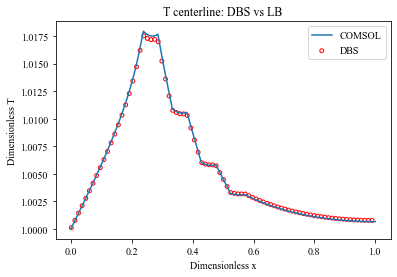

In [49]:
validate(df_comsol=df_comsol_x_centerline,time=0.002,file="x-centerline_T_O2_CO2.csv",axis='x',obj='T',refLength=L,refValue=Tref)

relative_error: 0.20944393942817358%


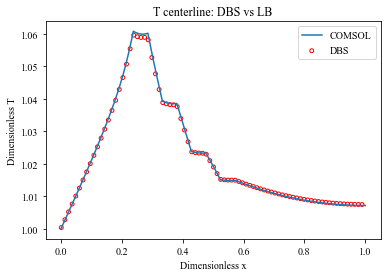

In [50]:
validate(df_comsol=df_comsol_x_centerline,time=0.004,file="x-centerline_T_O2_CO2.csv",axis='x',obj='T',refLength=L,refValue=Tref)

relative_error: 0.19474076737093235%


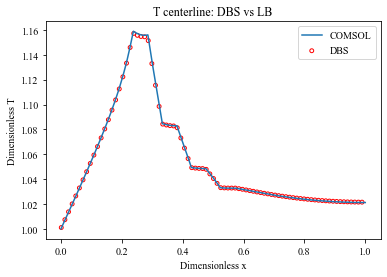

In [51]:
validate(df_comsol=df_comsol_x_centerline,time=0.006,file="x-centerline_T_O2_CO2.csv",axis='x',obj='T',refLength=L,refValue=Tref)

## Validate O2

relative_error: 0.8232879614531478%


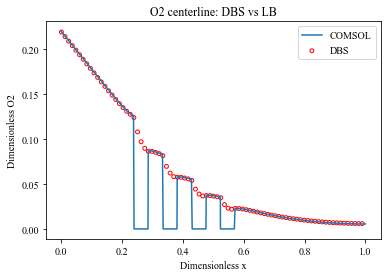

In [52]:
validate(df_comsol=df_comsol_x_centerline,time=0.002,file="x-centerline_T_O2_CO2.csv",axis='x',obj='O2',refLength=L,refValue=rhof/Mwf)

relative_error: 0.8392326797061416%


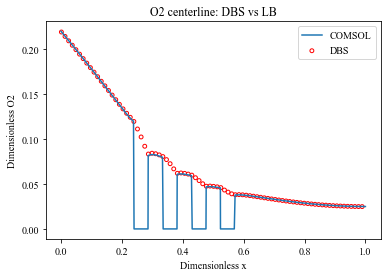

In [53]:
validate(df_comsol=df_comsol_x_centerline,time=0.004,file="x-centerline_T_O2_CO2.csv",axis='x',obj='O2',refLength=L,refValue=rhof/Mwf)

relative_error: 0.8943125900739017%


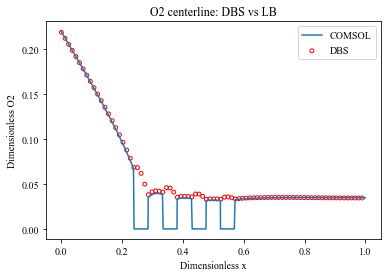

In [54]:
validate(df_comsol=df_comsol_x_centerline,time=0.006,file="x-centerline_T_O2_CO2.csv",axis='x',obj='O2',refLength=L,refValue=rhof/Mwf)

## Validate CO2

relative_error: 0.8693046434840199%


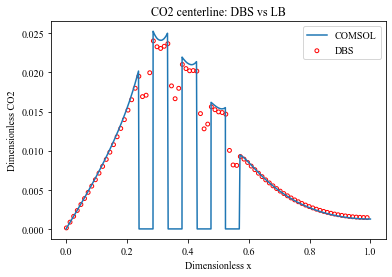

In [55]:
validate(df_comsol=df_comsol_x_centerline,time=0.002,file="x-centerline_T_O2_CO2.csv",axis='x',obj='CO2',refLength=L,refValue=rhof/Mwf)

relative_error: 0.8267575951977042%


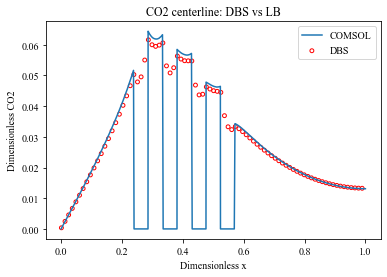

In [56]:
validate(df_comsol=df_comsol_x_centerline,time=0.004,file="x-centerline_T_O2_CO2.csv",axis='x',obj='CO2',refLength=L,refValue=rhof/Mwf)

relative_error: 0.835365077709083%


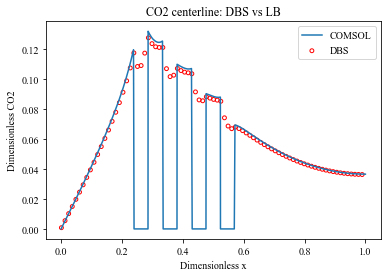

In [57]:
validate(df_comsol=df_comsol_x_centerline,time=0.006,file="x-centerline_T_O2_CO2.csv",axis='x',obj='CO2',refLength=L,refValue=rhof/Mwf)